In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime as dt
import re

import pandas_datareader.data as web
from pandas_datareader import data as pdr

import yfinance as yf

yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(231017)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

In [3]:
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

### Import Data & Data Cleaning

In [4]:
currency_pairs = [
    'SGD=X', 'SGDMYR=X', 'GBPSGD=X', 'EURSGD=X', 'SGDJPY=X', 'SGDHKD=X', 'SGDIDR=X',
    'SGDCNY=X', 'SGDPHP=X', 'SGDTHB=X', 'SGDINR=X', 'SGDVND=X', 'SGDKRW=X', 'AUDSGD=X',
    'NZDSGD=X', 'GBPUSD=X', 'JPY=X', 'HKD=X', 'MYR=X', 'INR=X', 'CNY=X', 'PHP=X',
    'IDR=X', 'THB=X', 'CHF=X', 'MXN=X', 'AUDUSD=X', 'NZDUSD=X', 'KRW=X', 'VND=X',
    'CAD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X', 'EURSEK=X', 'EURCHF=X', 'EURHUF=X',
    'EURJPY=X'
]


SGD=X: USD/SGD (US Dollar / Singapore Dollar) \
SGDMYR=X: SGD/MYR (Singapore Dollar / Malaysian Ringgit) \
GBPSGD=X: GBP/SGD (British Pound / Singapore Dollar) \
EURSGD=X: EUR/SGD (Euro / Singapore Dollar) \
SGDJPY=X: SGD/JPY (Singapore Dollar / Japanese Yen) \
SGDHKD=X: SGD/HKD (Singapore Dollar / Hong Kong Dollar) \
SGDIDR=X: SGD/IDR (Singapore Dollar / Indonesian Rupiah) \
SGDCNY=X: SGD/CNY (Singapore Dollar / Chinese Yuan) \
SGDPHP=X: SGD/PHP (Singapore Dollar / Philippine Peso) \
SGDTHB=X: SGD/THB (Singapore Dollar / Thai Baht) \
SGDINR=X: SGD/INR (Singapore Dollar / Indian Rupee) \
SGDVND=X: SGD/VND (Singapore Dollar / Vietnamese Dong) \
SGDKRW=X: SGD/KRW (Singapore Dollar / South Korean Won) \
AUDSGD=X: AUD/SGD (Australian Dollar / Singapore Dollar) \
NZDSGD=X: NZD/SGD (New Zealand Dollar / Singapore Dollar) \
GBPUSD=X: GBP/USD (British Pound / US Dollar) \
JPY=X: USD/JPY (US Dollar / Japanese Yen) \
HKD=X: USD/HKD (US Dollar / Hong Kong Dollar) \
MYR=X: USD/MYR (US Dollar / Malaysian Ringgit) \
INR=X: USD/INR (US Dollar / Indian Rupee) \
CNY=X: USD/CNY (US Dollar / Chinese Yuan) \
PHP=X: USD/PHP (US Dollar / Philippine Peso) \
IDR=X: USD/IDR (US Dollar / Indonesian Rupiah) \
THB=X: USD/THB (US Dollar / Thai Baht) \
CHF=X: USD/CHF (US Dollar / Swiss Franc) \
MXN=X: USD/MXN (US Dollar / Mexican Peso) \
AUDUSD=X: AUD/USD (Australian Dollar / US Dollar) \
NZDUSD=X: NZD/USD (New Zealand Dollar / US Dollar) \
KRW=X: USD/KRW (US Dollar / South Korean Won) \
VND=X: USD/VND (US Dollar / Vietnamese Dong) \
CAD=X: USD/CAD (US Dollar / Canadian Dollar) \
EURJPY=X: EUR/JPY (Euro / Japanese Yen) \
GBPJPY=X: GBP/JPY (British Pound / Japanese Yen) \
EURGBP=X: EUR/GBP (Euro / British Pound) \
EURSEK=X: EUR/SEK (Euro / Swedish Krona) \
EURCHF=X: EUR/CHF (Euro / Swiss Franc) \
EURHUF=X: EUR/HUF (Euro / Hungarian Forint)

In [5]:
# Initialize an empty dictionary to store the data
forex_data = {}

# Download data for each currency pair and store the "Adj Close" values
for pair in currency_pairs:
    data = yf.download(pair, start='2013-12-31', end='2024-05-25')
    forex_data[pair] = data['Adj Close']

# Convert the dictionary to a DataFrame
forex_df = pd.DataFrame(forex_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SGDPHP=X']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-12-31 -> 2024-05-25)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SGDVND=X']: Excepti

In [6]:
forex_df.head()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDPHP=X,SGDTHB=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31 00:00:00,1.26698,2.5456,2.0894,1.74970,82.772003,6.1179,9619.500000,4.7758,NaN,25.896999,...,0.821760,1054.300049,21055.0,1.06450,144.899994,173.028000,0.83720,8.85440,1.22520,296.119995
2014-01-01 00:00:00,1.26231,2.5535,2.0894,1.73540,82.772003,6.1446,9647.799805,4.7880,NaN,25.875999,...,0.822707,1054.800049,20835.0,1.06193,144.750000,174.300003,0.82973,8.84327,1.22720,296.911987
2014-01-02 00:00:00,1.26401,2.5480,2.0950,1.73980,83.301003,6.1324,9493.000000,4.7769,NaN,25.879999,...,0.820883,1050.750000,21055.0,1.06445,145.011002,174.593002,0.83040,8.85220,1.22725,296.700012
2014-01-03 00:00:00,1.26695,2.5518,2.0834,1.73110,82.723000,6.1187,9672.599609,4.7692,NaN,25.997000,...,0.818733,1049.599976,21050.0,1.06691,143.257004,172.403000,0.83079,8.91160,1.22873,297.589996
2014-01-06 00:00:00,1.26645,2.5564,2.0780,1.72174,82.769997,6.1208,9485.299805,4.7690,NaN,26.028999,...,0.826720,1053.800049,21050.0,1.06305,142.626007,172.138000,0.82850,8.86360,1.23050,298.649994


In [7]:
forex_df.describe()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDPHP=X,SGDTHB=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
count,2711.000000,2706.000000,2712.000000,2712.000000,2711.000000,2711.000000,2676.000000,2711.000000,0.0,2711.000000,...,2711.000000,2711.000000,2713.000000,2711.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000
mean,1.355504,3.037714,1.831844,1.544555,86.246462,5.752673,10243.293559,4.909988,NaN,24.554234,...,0.686842,1171.956326,22707.886134,1.289887,132.795416,157.589578,0.846479,10.159160,1.083139,338.235582
std,0.040507,0.244677,0.150225,0.074509,9.949081,0.173600,989.753241,0.202730,NaN,1.270506,...,0.064005,89.226602,1258.342546,0.074900,11.841694,18.145485,0.051407,0.744096,0.072521,32.134684
min,1.237160,0.737200,1.542990,1.380500,73.753998,5.323541,9.580800,4.425900,NaN,21.271000,...,0.557240,999.830017,21.000000,1.061930,111.202003,125.961998,0.694100,8.754700,0.927700,296.118988
25%,1.339670,2.979950,1.730803,1.494792,80.110699,5.663500,9598.875244,4.779950,NaN,23.671000,...,0.641764,1114.114990,22084.000000,1.261235,124.256752,142.605251,0.833758,9.490075,1.043152,310.870499
50%,1.356660,3.050700,1.788035,1.538560,82.084999,5.749300,10403.600098,4.899397,NaN,24.665001,...,0.680092,1153.939941,22861.000000,1.308260,130.605003,153.019501,0.859000,10.215995,1.083720,323.447495
75%,1.378305,3.120914,1.875612,1.596500,89.535500,5.820600,10711.321777,5.028833,NaN,25.601500,...,0.718355,1210.000000,23253.000000,1.337845,138.730247,172.159996,0.881092,10.611050,1.129843,362.719505
max,1.456300,3.569286,2.222360,1.761400,116.162903,6.263000,11953.043945,5.447876,NaN,27.245575,...,0.882379,1443.959961,25469.000000,1.457800,169.822006,199.339005,0.979000,11.943280,1.238240,431.815002


In [8]:
forex_df.isna().sum().sort_values(ascending = False)

#drop 'SGDPHP=X' and 'SGDVND=X', other use ffill

SGDPHP=X    2714
SGDVND=X    2714
SGDIDR=X      38
SGDMYR=X       8
CNY=X          4
SGD=X          3
JPY=X          3
KRW=X          3
NZDUSD=X       3
AUDUSD=X       3
CHF=X          3
THB=X          3
IDR=X          3
PHP=X          3
INR=X          3
HKD=X          3
GBPUSD=X       3
CAD=X          3
NZDSGD=X       3
SGDKRW=X       3
SGDINR=X       3
SGDTHB=X       3
SGDCNY=X       3
SGDHKD=X       3
SGDJPY=X       3
EURGBP=X       2
GBPJPY=X       2
EURSEK=X       2
EURCHF=X       2
EURJPY=X       2
MYR=X          2
AUDSGD=X       2
EURSGD=X       2
GBPSGD=X       2
EURHUF=X       2
VND=X          1
MXN=X          1
dtype: int64

In [9]:
drop = ['SGDPHP=X', 'SGDVND=X']

forex_df = forex_df.drop(labels = drop, axis = 1)

In [10]:
forex_df.shape

(2714, 35)

In [11]:
forex_df = forex_df.fillna(method="ffill")

In [12]:
forex_df.isna().sum().sort_values(ascending = False)

SGD=X       0
KRW=X       0
IDR=X       0
THB=X       0
CHF=X       0
MXN=X       0
AUDUSD=X    0
NZDUSD=X    0
VND=X       0
CNY=X       0
CAD=X       0
EURJPY=X    0
GBPJPY=X    0
EURGBP=X    0
EURSEK=X    0
EURCHF=X    0
PHP=X       0
INR=X       0
SGDMYR=X    0
SGDTHB=X    0
GBPSGD=X    0
EURSGD=X    0
SGDJPY=X    0
SGDHKD=X    0
SGDIDR=X    0
SGDCNY=X    0
SGDINR=X    0
MYR=X       0
SGDKRW=X    0
AUDSGD=X    0
NZDSGD=X    0
GBPUSD=X    0
JPY=X       0
HKD=X       0
EURHUF=X    0
dtype: int64

### Exploratory Data Analysis (EDA)

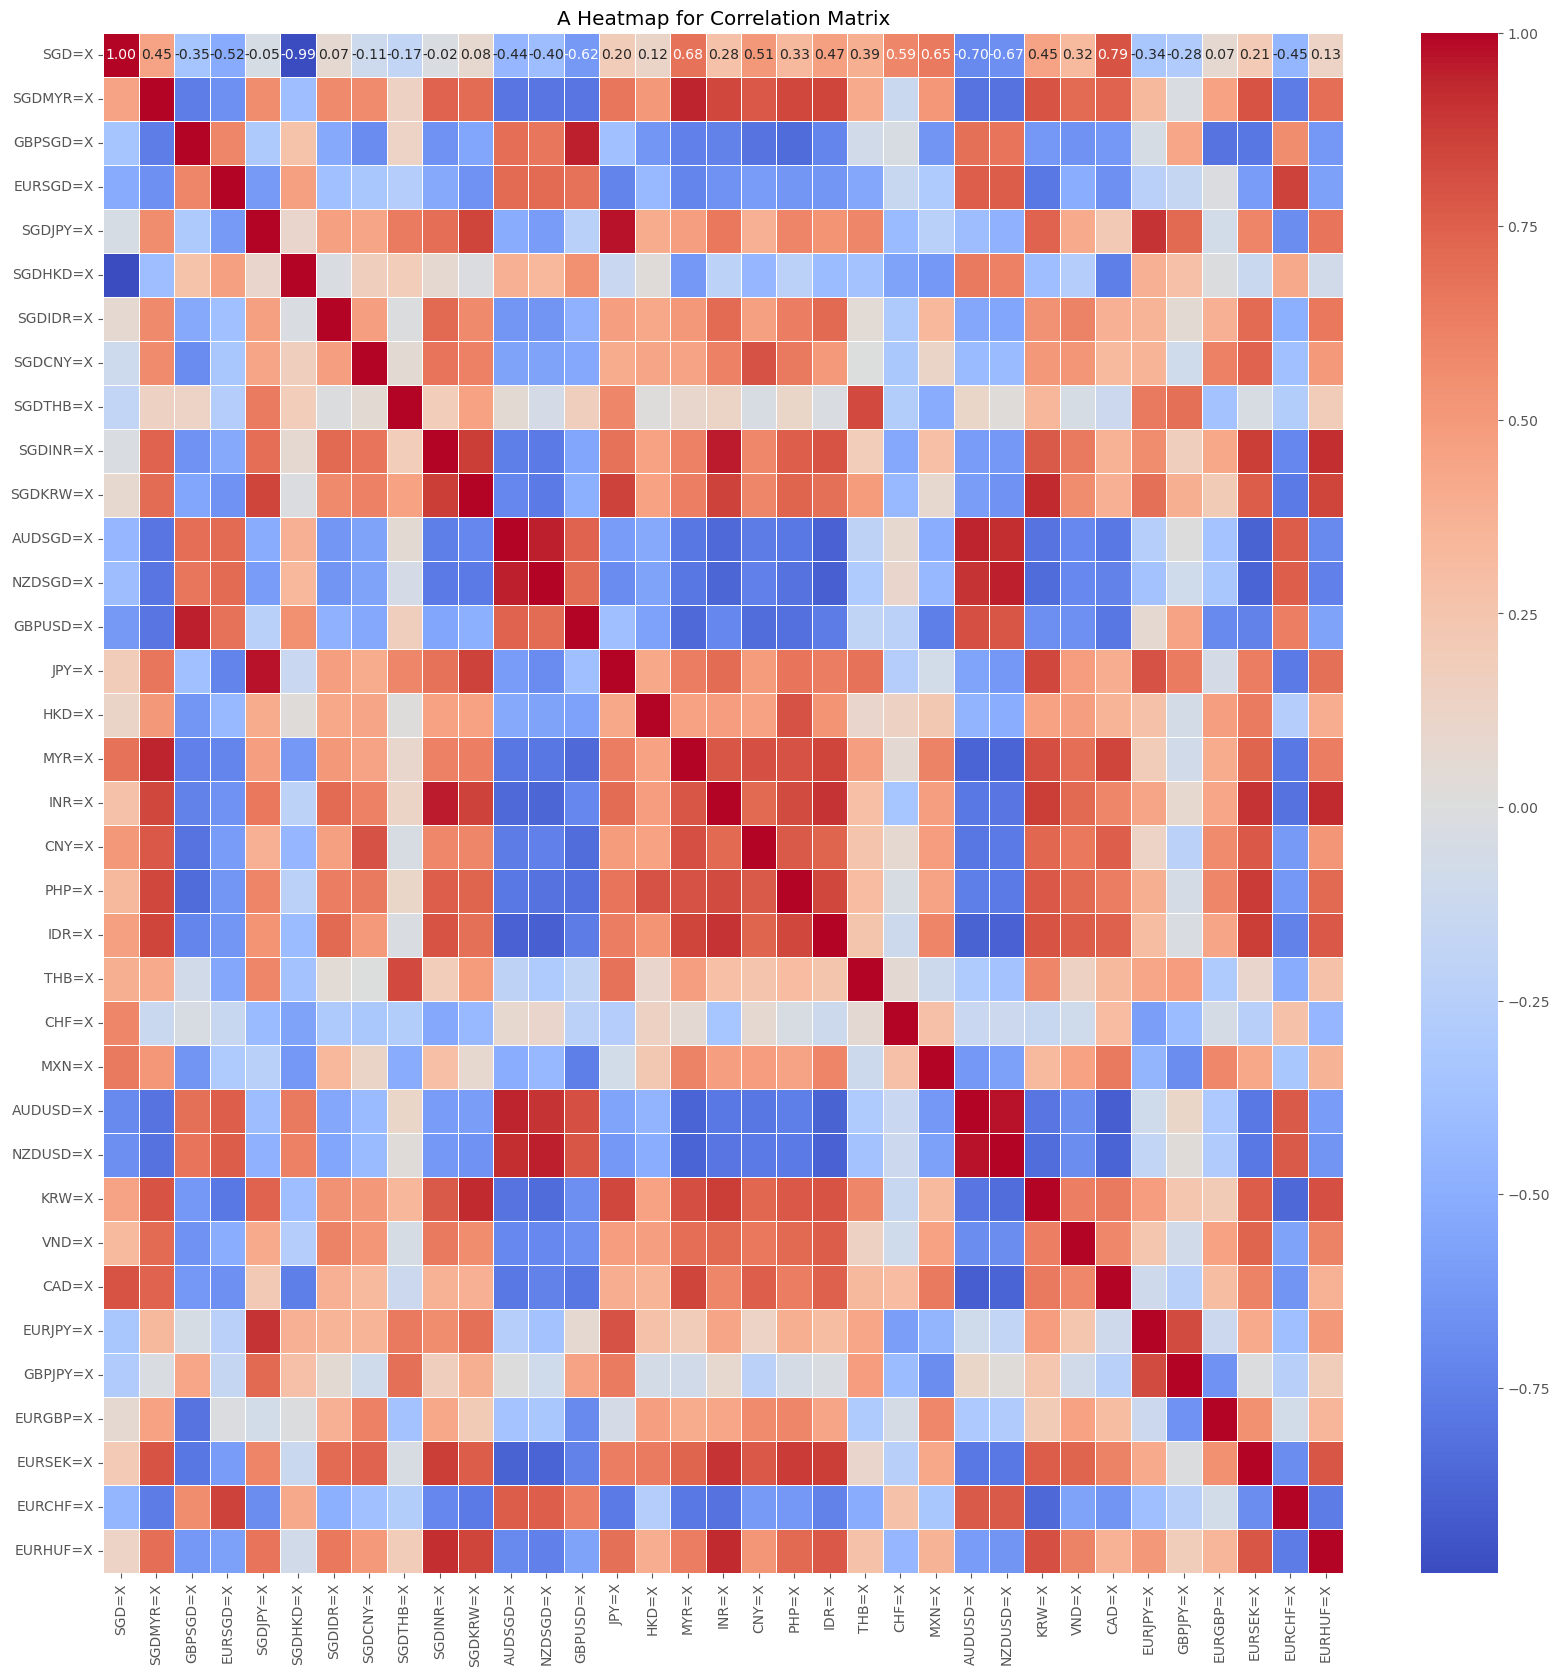

In [13]:
corr = forex_df.corr()

plt.figure(figsize = [20, 20])

plt.title("A Heatmap for Correlation Matrix")

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.show()

### Calculate Return

In [14]:
return_df = forex_df.pct_change()

return_df.shape

(2714, 35)

In [15]:
return_df = return_df.dropna()

### Data Transformation

In [16]:
scaler = StandardScaler().fit(return_df)

In [17]:
scaled_df = pd.DataFrame(scaler.fit_transform(return_df),
                         columns = return_df.columns,
                         index = return_df.index)

scaled_df.describe()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDTHB=X,SGDINR=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
count,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,...,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03
mean,-2.029748e-17,5.238059e-18,1.309515e-18,9.166604e-18,-5.238059e-18,1.309515e-17,-1.780940e-16,-5.892817e-18,-2.619030e-18,2.619030e-18,...,7.202331e-18,2.619030e-18,-4.714253e-17,1.571418e-17,-8.511846e-18,2.488078e-17,3.601166e-18,-1.178563e-17,1.964272e-18,9.166604e-18
std,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,...,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00
min,-5.394633e+00,-1.185698e+01,-1.415894e+01,-5.905539e+00,-7.190529e+00,-4.506012e+00,-6.851402e-02,-1.699507e+01,-5.481158e+00,-7.306025e+00,...,-5.613785e+00,-6.078578e+00,-6.407669e-02,-6.843971e+00,-3.550256e+01,-3.310672e+01,-1.811094e+01,-1.708849e+01,-3.203594e+01,-2.891770e+01
25%,-5.949627e-01,-4.555569e-02,-4.987609e-01,-5.248538e-01,-5.183118e-01,-5.703125e-01,-4.305014e-02,-4.279387e-01,-2.643929e-01,-4.762582e-01,...,-6.051734e-01,-5.736572e-01,-2.728105e-02,-5.538199e-01,-3.837662e-01,-3.729507e-01,-4.579545e-01,-5.377349e-01,-3.015396e-01,-4.245598e-01
50%,-2.412522e-02,-1.569774e-02,-1.011183e-02,-9.476313e-03,2.316605e-02,1.153485e-02,-4.297211e-02,-1.587358e-03,-6.010145e-03,-2.095962e-02,...,1.151233e-02,-1.079316e-03,-2.726355e-02,4.767820e-03,6.642116e-03,1.991503e-02,-1.403578e-02,-3.357933e-03,-1.322899e-02,-1.344379e-02
75%,5.712664e-01,1.673801e-02,4.964380e-01,5.057165e-01,5.284499e-01,5.839161e-01,-4.288892e-02,4.115919e-01,2.454312e-01,4.728641e-01,...,6.358850e-01,5.832595e-01,-2.724004e-02,5.694151e-01,4.147481e-01,4.071551e-01,4.176582e-01,5.519213e-01,3.106140e-01,4.403116e-01
max,4.771242e+00,5.060476e+01,5.736696e+00,1.346111e+01,5.125388e+00,5.437866e+00,2.562856e+01,1.893758e+01,4.845084e+00,7.324151e+00,...,4.408743e+00,5.076345e+00,3.684721e+01,6.517462e+00,3.190148e+00,5.077997e+00,2.013950e+01,6.747929e+00,2.636675e+01,5.235679e+00


In [18]:
scaler = StandardScaler().fit(return_df)

In [19]:
scaled_df = pd.DataFrame(scaler.fit_transform(return_df),
                         columns = return_df.columns,
                         index = return_df.index)

scaled_df.describe()

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDTHB=X,SGDINR=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
count,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,...,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03
mean,-2.029748e-17,5.238059e-18,1.309515e-18,9.166604e-18,-5.238059e-18,1.309515e-17,-1.780940e-16,-5.892817e-18,-2.619030e-18,2.619030e-18,...,7.202331e-18,2.619030e-18,-4.714253e-17,1.571418e-17,-8.511846e-18,2.488078e-17,3.601166e-18,-1.178563e-17,1.964272e-18,9.166604e-18
std,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,...,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00,1.000184e+00
min,-5.394633e+00,-1.185698e+01,-1.415894e+01,-5.905539e+00,-7.190529e+00,-4.506012e+00,-6.851402e-02,-1.699507e+01,-5.481158e+00,-7.306025e+00,...,-5.613785e+00,-6.078578e+00,-6.407669e-02,-6.843971e+00,-3.550256e+01,-3.310672e+01,-1.811094e+01,-1.708849e+01,-3.203594e+01,-2.891770e+01
25%,-5.949627e-01,-4.555569e-02,-4.987609e-01,-5.248538e-01,-5.183118e-01,-5.703125e-01,-4.305014e-02,-4.279387e-01,-2.643929e-01,-4.762582e-01,...,-6.051734e-01,-5.736572e-01,-2.728105e-02,-5.538199e-01,-3.837662e-01,-3.729507e-01,-4.579545e-01,-5.377349e-01,-3.015396e-01,-4.245598e-01
50%,-2.412522e-02,-1.569774e-02,-1.011183e-02,-9.476313e-03,2.316605e-02,1.153485e-02,-4.297211e-02,-1.587358e-03,-6.010145e-03,-2.095962e-02,...,1.151233e-02,-1.079316e-03,-2.726355e-02,4.767820e-03,6.642116e-03,1.991503e-02,-1.403578e-02,-3.357933e-03,-1.322899e-02,-1.344379e-02
75%,5.712664e-01,1.673801e-02,4.964380e-01,5.057165e-01,5.284499e-01,5.839161e-01,-4.288892e-02,4.115919e-01,2.454312e-01,4.728641e-01,...,6.358850e-01,5.832595e-01,-2.724004e-02,5.694151e-01,4.147481e-01,4.071551e-01,4.176582e-01,5.519213e-01,3.106140e-01,4.403116e-01
max,4.771242e+00,5.060476e+01,5.736696e+00,1.346111e+01,5.125388e+00,5.437866e+00,2.562856e+01,1.893758e+01,4.845084e+00,7.324151e+00,...,4.408743e+00,5.076345e+00,3.684721e+01,6.517462e+00,3.190148e+00,5.077997e+00,2.013950e+01,6.747929e+00,2.636675e+01,5.235679e+00


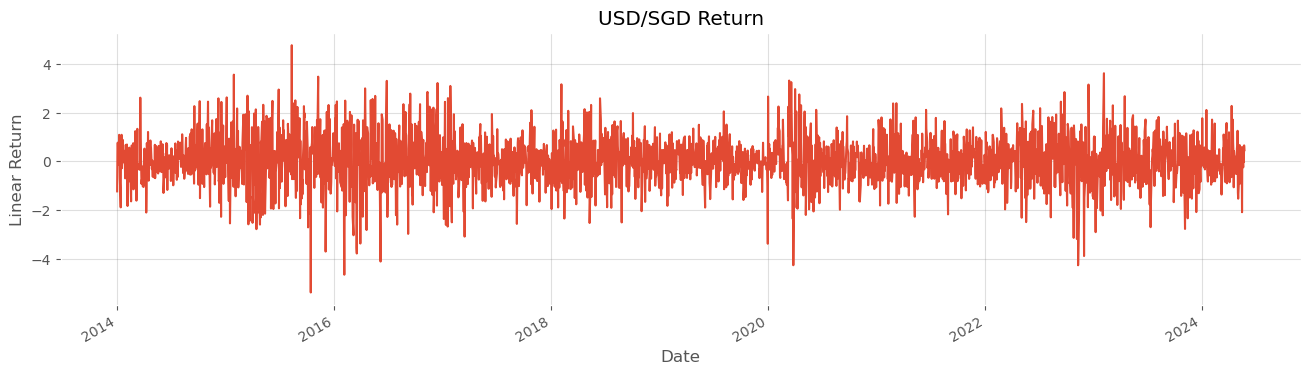

In [20]:
plt.figure(figsize = [16, 4])

plt.title("USD/SGD Return")

plt.ylabel("Linear Return")

scaled_df['SGD=X'].plot()

plt.show()

### PCA

In [21]:
prop = int(len(scaled_df) * 0.8)

X_Train = scaled_df[    : prop] # First 80% of the data

In [22]:
prop = int(len(forex_df) * 0.8)  # Split at 80% for training
forex_train = forex_df[:prop]        # First 80% of data for training
forex_test = forex_df[prop:]         # Remaining 20% of data for testing

In [23]:
correlation_matrix = X_Train.corr()

In [24]:
pca = PCA()
principal_components = pca.fit_transform(correlation_matrix)

In [25]:
from arch.unitroot.cointegration import engle_granger
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Initialize a list to store the results
results_table = []

# Assuming pca.components_ contains the principal components and forex_df contains the forex data
for i in range(pca.components_.shape[0]):
    first_component = pca.components_[i, :]
    highest = forex_train.columns[abs(first_component).argmax()]
    lowest = forex_train.columns[abs(first_component).argmin()]

    log_price = np.log(forex_train[[highest, lowest]])

     # Perform OLS regression of highest on lowest
    X = sm.add_constant(log_price[lowest])
    model = sm.OLS(log_price[highest], X).fit()
    cointegration_factor = model.params[1]  # The slope coefficient

    # Perform Engle-Granger cointegration test
    coint_result = engle_granger(log_price.iloc[:, 0], log_price.iloc[:, 1], trend="c", lags=0)
    pvalue_coint = coint_result.pvalue

    # Perform ADF test for stationarity
    adf_result = adfuller(log_price.iloc[:, 0] - log_price.iloc[:, 1], maxlag=0)
    pvalue_adf = adf_result[1]

    cointegrated = "Yes" if pvalue_coint < 0.05 else "No"
    stationary = "Yes" if pvalue_adf < 0.05 else "No"

    results_table.append([f'Principal Component {i+1}', highest, lowest, cointegration_factor, cointegrated, stationary])

# Print the results as a table using tabulate
print(tabulate(results_table, headers=["Component", "Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Component               Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
----------------------  ---------------  --------------  ----------------------  --------------  ------------
Principal Component 1   SGD=X            VND=X                        0.0231706  Yes             Yes
Principal Component 2   JPY=X            CNY=X                       -0.197788   No              No
Principal Component 3   GBPSGD=X         MXN=X                       -0.389281   No              No
Principal Component 4   EURSGD=X         GBPJPY=X                     0.0719028  No              No
Principal Component 5   EURJPY=X         CAD=X                       -0.662183   No              No
Principal Component 6   NZDSGD=X         INR=X                       -0.576451   No              No
Principal Component 7   EURCHF=X         SGDINR=X                    -0.225522   No              No
Principal Component 8   MYR=X            AUDSGD=X                    -0.972927   

In [26]:
# Filter the results table to include only pairs where both stationary and cointegrated are "Yes"
filtered_results = [result for result in results_table if result[4] == "Yes" and result[5] == "Yes"]

# Print the filtered results
print(tabulate(filtered_results, headers=["Component", "Highest Asset", "Lowest Asset", "Cointegrated Factor", "Cointegrated", "Stationary"]))

Component               Highest Asset    Lowest Asset      Cointegrated Factor  Cointegrated    Stationary
----------------------  ---------------  --------------  ---------------------  --------------  ------------
Principal Component 1   SGD=X            VND=X                       0.0231706  Yes             Yes
Principal Component 11  VND=X            GBPJPY=X                   -0.319707   Yes             Yes
Principal Component 12  SGDMYR=X         SGDKRW=X                    0.616545   Yes             Yes
Principal Component 13  SGDIDR=X         EURCHF=X                   -0.316249   Yes             Yes
Principal Component 15  AUDSGD=X         EURCHF=X                    0.717115   Yes             Yes
Principal Component 16  SGDTHB=X         JPY=X                       0.146243   Yes             Yes
Principal Component 19  EURHUF=X         SGDINR=X                    0.913706   Yes             Yes
Principal Component 29  EURJPY=X         VND=X                      -0.0387438  Yes 

### PCA + OPTICS Clustering

In [27]:
from sklearn.cluster import OPTICS

# Set parameters for OPTICS
min_samples_value = 2  # Adjust as needed
max_eps_value = np.inf  # Setting to infinity allows OPTICS to determine the optimal epsilon

# Apply OPTICS
clf = OPTICS(min_samples=min_samples_value, max_eps=max_eps_value)
clf.fit(correlation_matrix)

# Extract the cluster labels
labels = clf.labels_

# Calculate the number of clusters
n_clusters_ = len(set(labels))
print(f"\nClusters discovered: {n_clusters_}")

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Stock': return_df.columns,
    'Cluster': labels
})

# Print the results as a table
print(tabulate(results_df, headers="keys", tablefmt="pretty"))

# Optional: Filter out noise points (label == -1) if needed
clustered_df = results_df[results_df['Cluster'] != -1]

print("\nClustered Stocks:")
print(tabulate(clustered_df, headers="keys", tablefmt="pretty"))

# Align the labels with the original DataFrame
clustered_series = pd.Series(index=return_df.columns, data=labels)

# Calculate the number of clusters and pairs to evaluate
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts > 1) & (counts <= CLUSTER_SIZE_LIMIT)]


Clusters discovered: 7
+----+----------+---------+
|    |  Stock   | Cluster |
+----+----------+---------+
| 0  |  SGD=X   |    0    |
| 1  | SGDMYR=X |   -1    |
| 2  | GBPSGD=X |    5    |
| 3  | EURSGD=X |   -1    |
| 4  | SGDJPY=X |    5    |
| 5  | SGDHKD=X |    4    |
| 6  | SGDIDR=X |   -1    |
| 7  | SGDCNY=X |    3    |
| 8  | SGDTHB=X |    3    |
| 9  | SGDINR=X |    3    |
| 10 | SGDKRW=X |   -1    |
| 11 | AUDSGD=X |   -1    |
| 12 | NZDSGD=X |    4    |
| 13 | GBPUSD=X |    5    |
| 14 |  JPY=X   |   -1    |
| 15 |  HKD=X   |   -1    |
| 16 |  MYR=X   |    2    |
| 17 |  INR=X   |    1    |
| 18 |  CNY=X   |   -1    |
| 19 |  PHP=X   |   -1    |
| 20 |  IDR=X   |    1    |
| 21 |  THB=X   |   -1    |
| 22 |  CHF=X   |   -1    |
| 23 |  MXN=X   |    2    |
| 24 | AUDUSD=X |    4    |
| 25 | NZDUSD=X |    4    |
| 26 |  KRW=X   |    0    |
| 27 |  VND=X   |   -1    |
| 28 |  CAD=X   |    0    |
| 29 | EURJPY=X |    5    |
| 30 | GBPJPY=X |    5    |
| 31 | EURGBP=X |   -1  

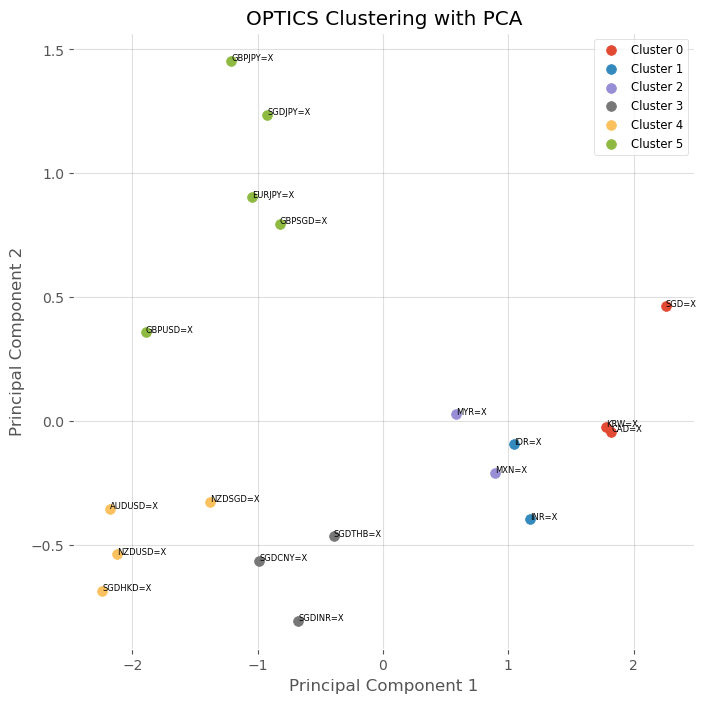

In [28]:
filtered_labels = labels[labels != -1]

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(correlation_matrix)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels
pca_df = pca_df.loc[pca_df['Cluster'] != -1]

filtered_results1 = results_df.copy()
filtered_results1['Cluster'] = labels
filtered_results1 = filtered_results1.loc[filtered_results1['Cluster'] != -1]
filtered_results1 = filtered_results1.set_index(keys='Stock')

# Plot the clusters
plt.figure(figsize=(8, 8))

# Iterate over unique clusters and plot each with a separate color and label (excluding -1)
for cluster in np.unique(filtered_labels):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s = 50)

# Mark out filtered stock names on the plot
for i, txt in enumerate(filtered_results1.index):
    plt.annotate(txt, (pca_df['PC1'].iloc[i], pca_df['PC2'].iloc[i]), fontsize=6)

plt.title('OPTICS Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize='small')
plt.show()

In [29]:
from itertools import combinations

# Print clusters formed and pairs to evaluate
pairs_to_evaluate = int((ticker_count_reduced * (ticker_count_reduced - 1) / 2).sum())
print(f"Pairs to evaluate: {pairs_to_evaluate}")

# Group stocks by cluster
clusters = clustered_df.groupby('Cluster')['Stock'].apply(list).to_dict()

# Generate pairs from each cluster
pairs = []
for cluster, stocks in clusters.items():
    if len(stocks) > 1:
        pairs.extend(list(combinations(stocks, 2)))

# Display pairs of stocks
print("\nStock Pairs for Pairs Trading:")
for pair in pairs:
    print(pair)

Pairs to evaluate: 144

Stock Pairs for Pairs Trading:
('SGD=X', 'KRW=X')
('SGD=X', 'CAD=X')
('KRW=X', 'CAD=X')
('INR=X', 'IDR=X')
('MYR=X', 'MXN=X')
('SGDCNY=X', 'SGDTHB=X')
('SGDCNY=X', 'SGDINR=X')
('SGDTHB=X', 'SGDINR=X')
('SGDHKD=X', 'NZDSGD=X')
('SGDHKD=X', 'AUDUSD=X')
('SGDHKD=X', 'NZDUSD=X')
('NZDSGD=X', 'AUDUSD=X')
('NZDSGD=X', 'NZDUSD=X')
('AUDUSD=X', 'NZDUSD=X')
('GBPSGD=X', 'SGDJPY=X')
('GBPSGD=X', 'GBPUSD=X')
('GBPSGD=X', 'EURJPY=X')
('GBPSGD=X', 'GBPJPY=X')
('SGDJPY=X', 'GBPUSD=X')
('SGDJPY=X', 'EURJPY=X')
('SGDJPY=X', 'GBPJPY=X')
('GBPUSD=X', 'EURJPY=X')
('GBPUSD=X', 'GBPJPY=X')
('EURJPY=X', 'GBPJPY=X')


In [30]:
results_table1 = []

# Iterate through each pair directly
for pair in pairs:
    highest, lowest = pair  # Unpack the pair tuple

    log_price = np.log(forex_train[[highest, lowest]])

    # Perform OLS regression of highest on lowest
    X = sm.add_constant(log_price[lowest])
    model = sm.OLS(log_price[highest], X).fit()
    cointegration_factor = model.params[1]  # The slope coefficient

    # Perform Engle-Granger cointegration test
    coint_result = engle_granger(log_price.iloc[:, 0], log_price.iloc[:, 1], trend="c", lags=0)
    pvalue_coint = coint_result.pvalue

    # Perform ADF test for stationarity on residuals
    residuals = model.resid
    adf_result = adfuller(residuals, maxlag=0)
    adf_statistic, pvalue_adf, _, _, adf_critical_values, _ = adf_result

    cointegrated = "Yes" if pvalue_coint < 0.05 else "No"
    stationary = "Yes" if pvalue_adf < 0.05 else "No"

    results_table1.append([highest, lowest, cointegration_factor, cointegrated, stationary])

# Print the results as a table using tabulate
print(tabulate(results_table1, headers=["Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
---------------  --------------  ----------------------  --------------  ------------
SGD=X            KRW=X                         0.559117  No              Yes
SGD=X            CAD=X                         0.460465  Yes             Yes
KRW=X            CAD=X                         0.533489  No              Yes
INR=X            IDR=X                         0.902843  Yes             Yes
MYR=X            MXN=X                         0.512549  No              Yes
SGDCNY=X         SGDTHB=X                     -0.376809  Yes             Yes
SGDCNY=X         SGDINR=X                      0.187351  No              Yes
SGDTHB=X         SGDINR=X                     -0.442553  Yes             Yes
SGDHKD=X         NZDSGD=X                      0.301915  No              No
SGDHKD=X         AUDUSD=X                      0.299359  No              No
SGDHKD=X         NZDUSD=X                      0.313666  No   

In [31]:
filtered_results1 = [result for result in results_table1 if result[3] == "Yes" and result[4] == "Yes"]

# Print the filtered results
print(tabulate(filtered_results1, headers=["Highest Asset", "Lowest Asset", "Cointegration Factor", "Cointegrated", "Stationary"]))

Highest Asset    Lowest Asset      Cointegration Factor  Cointegrated    Stationary
---------------  --------------  ----------------------  --------------  ------------
SGD=X            CAD=X                         0.460465  Yes             Yes
INR=X            IDR=X                         0.902843  Yes             Yes
SGDCNY=X         SGDTHB=X                     -0.376809  Yes             Yes
SGDTHB=X         SGDINR=X                     -0.442553  Yes             Yes
NZDSGD=X         AUDUSD=X                      0.592968  Yes             Yes
AUDUSD=X         NZDUSD=X                      1.02699   Yes             Yes


### Convert all Currency to USD

In [32]:
converted_us = forex_df.copy()

converted_us['SGD=X'] = 1/forex_df['SGD=X']
converted_us['SGDMYR=X'] = forex_df['SGDMYR=X']/forex_df['MYR=X']
converted_us['GBPSGD=X'] = forex_df['GBPSGD=X']/forex_df['SGD=X']
converted_us['EURSGD=X'] = forex_df['EURSGD=X']/forex_df['SGD=X']
converted_us['SGDJPY=X'] = forex_df['SGDJPY=X']/forex_df['JPY=X']
converted_us['SGDHKD=X'] = forex_df['SGDJPY=X']/forex_df['HKD=X']
converted_us['SGDIDR=X'] = forex_df['SGDIDR=X']/forex_df['IDR=X']
converted_us['SGDCNY=X'] = forex_df['SGDCNY=X']/forex_df['CNY=X']
converted_us['SGDTHB=X'] = forex_df['SGDTHB=X']/forex_df['THB=X']
converted_us['SGDINR=X'] = forex_df['SGDINR=X']/forex_df['INR=X']
converted_us['SGDKRW=X'] = forex_df['SGDKRW=X']/forex_df['KRW=X']
converted_us['AUDSGD=X'] = forex_df['AUDSGD=X']/forex_df['SGD=X']
converted_us['NZDSGD=X'] = forex_df['NZDSGD=X']/forex_df['SGD=X']
converted_us['SGDINR=X'] = forex_df['SGDINR=X']/forex_df['INR=X']
converted_us['JPY=X'] = 1/forex_df['JPY=X']
converted_us['HKD=X'] = 1/forex_df['HKD=X']
converted_us['MYR=X'] = 1/forex_df['MYR=X']
converted_us['INR=X'] = 1/forex_df['INR=X']
converted_us['CNY=X'] = 1/forex_df['CNY=X']
converted_us['INR=X'] = 1/forex_df['INR=X']
converted_us['PHP=X'] = 1/forex_df['PHP=X']
converted_us['IDR=X'] = 1/forex_df['IDR=X']
converted_us['THB=X'] = 1/forex_df['THB=X']
converted_us['CHF=X'] = 1/forex_df['CHF=X']
converted_us['MXN=X'] = 1/forex_df['MXN=X']
converted_us['KRW=X'] = 1/forex_df['KRW=X']
converted_us['VND=X'] = 1/forex_df['VND=X']
converted_us['CAD=X'] = 1/forex_df['CAD=X']
converted_us['EURJPY=X'] = forex_df['EURJPY=X']/forex_df['JPY=X']
converted_us['GBPJPY=X'] = forex_df['GBPJPY=X']/forex_df['JPY=X']
converted_us['EURGBP=X'] = forex_df['EURGBP=X'] * forex_df['GBPUSD=X']
converted_us['EURCHF=X'] = forex_df['EURCHF=X'] * forex_df['CHF=X']

In [34]:
converted_us

,SGD=X,SGDMYR=X,GBPSGD=X,EURSGD=X,SGDJPY=X,SGDHKD=X,SGDIDR=X,SGDCNY=X,SGDTHB=X,SGDINR=X,...,NZDUSD=X,KRW=X,VND=X,CAD=X,EURJPY=X,GBPJPY=X,EURGBP=X,EURSEK=X,EURCHF=X,EURHUF=X
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,0.789278,0.777116,1.649118,1.381000,0.788801,10.674267,0.787386,0.789154,0.789230,0.790029,...,0.821760,0.000948,0.000047,0.939408,1.380868,1.648922,1.380971,8.85440,1.086997,296.119995
2014-01-01,0.792198,0.779528,1.655219,1.374781,0.786059,10.675974,0.793535,0.792191,0.791436,0.791094,...,0.822707,0.000948,0.000048,0.941682,1.374644,1.655271,1.374362,8.84327,1.095509,296.911987
2014-01-02,0.791133,0.774633,1.657424,1.376413,0.790902,10.742861,0.780803,0.790354,0.792916,0.791009,...,0.820883,0.000952,0.000047,0.939452,1.376809,1.657675,1.376863,8.85220,1.094093,296.700012
2014-01-03,0.789297,0.777798,1.644422,1.366352,0.789093,10.669227,0.799256,0.789511,0.789031,0.791154,...,0.818733,0.000953,0.000048,0.937286,1.366526,1.644549,1.366476,8.91160,1.104800,297.589996
2014-01-06,0.789609,0.778441,1.640807,1.359501,0.788947,10.674586,0.783132,0.789373,0.789883,0.789185,...,0.826720,0.000949,0.000048,0.940689,1.359482,1.640785,1.359824,8.86360,1.113639,298.649994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,0.740796,0.740905,1.272531,1.082673,0.740434,14.868231,0.740443,0.724773,0.739987,0.739678,...,0.610009,0.000732,0.000039,0.730514,1.082500,1.272074,1.082509,11.62059,0.906491,386.889008
2024-05-24,0.739765,0.739697,1.269260,1.081226,0.739739,14.870828,0.739795,0.725451,0.739812,0.739133,...,0.609730,0.000731,0.000039,0.728221,1.081167,1.269155,1.081179,11.60856,0.903952,386.075012
2019-05-22,0.739765,0.739697,1.293480,1.136916,0.739739,14.870828,0.739795,0.725451,0.739812,0.739133,...,0.609730,0.000731,0.000039,0.728221,0.786365,0.895014,1.115186,10.76890,1.031931,325.858002
